# NPGO Demonstration

In this section, we will generate a plot of NPGO vs time, demonstrating why we chose 2011 and 2018 as critical years to analyze. 

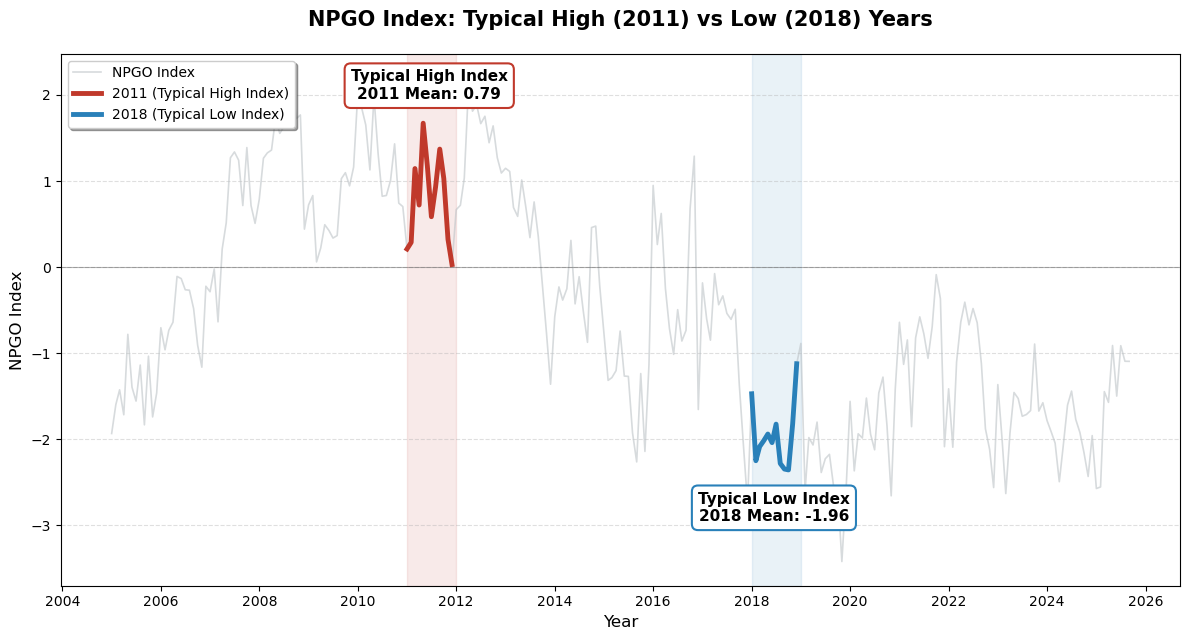

In [12]:
# NPGO Index Time Series

import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.dates as mdates

# 1. 加载数据
file_path = '/home/jqiu/Programing/Projects/analysis-junqi/Diaton_vs_Flagellate_Report/Data_NPGO/npgo.csv'
df = pd.read_csv(file_path, skiprows=1, names=['Date', 'NPGO'], skipinitialspace=True)

# 2. 数据清洗
df['Date'] = pd.to_datetime(df['Date'])
df['NPGO'] = pd.to_numeric(df['NPGO'], errors='coerce')
df.loc[df['NPGO'] == -9999, 'NPGO'] = None
df = df.dropna()

# 3. 调整范围：只保留 2005 年以后的数据
df_filtered = df[df['Date'] >= '2005-01-01'].copy()


# 4. 开始绘图
plt.figure(figsize=(12, 6.5))
plt.plot(df_filtered['Date'], df_filtered['NPGO'], color='#bdc3c7', linewidth=1.2, label='NPGO Index', alpha=0.6)
plt.axhline(0, color='black', linestyle='-', linewidth=0.8, alpha=0.3)

# 5. 定义要标注的特殊年份及其属性
special_years = {
    2011: {"label": "Typical High Index", "color": "#c0392b"}, # 深红
    2018: {"label": "Typical Low Index", "color": "#2980b9"}   # 深蓝
}

for year, info in special_years.items():
    year_data = df_filtered[df_filtered['Date'].dt.year == year]
    
    if not year_data.empty:
        # 计算该年平均值
        annual_mean = year_data['NPGO'].mean()
        
        # 突出显示该年曲线
        plt.plot(year_data['Date'], year_data['NPGO'], color=info['color'], linewidth=3.5, label=f"{year} ({info['label']})")
        
        # 阴影填充
        plt.axvspan(pd.Timestamp(f'{year}-01-01'), pd.Timestamp(f'{year}-12-31'), color=info['color'], alpha=0.1)
        
        # 标注平均值
        # 确定标注的垂直位置：如果是高值年标在上方，低值年标在下方
        va = 'bottom' if annual_mean > 0 else 'top'
        xy_text = (0, 70) if annual_mean > 0 else (0, -40)
        
        # 找到该年中点日期用于放置标注
        mid_date = pd.Timestamp(f'{year}-06-15')
        
        plt.annotate(f"{info['label']}\n{year} Mean: {annual_mean:.2f}",
                     xy=(mid_date, annual_mean),
                     xytext=xy_text,
                     textcoords='offset points',
                     ha='center', va=va,
                     # arrowprops=dict(arrowstyle='->', color=info['color'], connectionstyle="arc3,rad=0.1"),
                     fontsize=11, fontweight='bold',
                     bbox=dict(boxstyle="round,pad=0.4", fc="white", ec=info['color'], lw=1.5))

# 6. 图表装饰
plt.title('NPGO Index: Typical High (2011) vs Low (2018) Years', fontsize=15, fontweight='bold', pad=20)
plt.ylabel('NPGO Index', fontsize=12)
plt.xlabel('Year', fontsize=12)
plt.grid(True, axis='y', linestyle='--', alpha=0.4)

# 优化时间轴
plt.gca().xaxis.set_major_locator(mdates.YearLocator(2))
plt.gca().xaxis.set_major_formatter(mdates.DateFormatter('%Y'))

plt.legend(loc='upper left', frameon=True, shadow=True)
plt.tight_layout()

# 保存并显示
plt.savefig('npgo_time_series.svg', format='svg', bbox_inches='tight')
plt.show()

The North Pacific Gyre Oscillation (NPGO) represents the second-dominant mode of sea surface height and temperature variability across the Northeast Pacific, serving as a critical indicator of regional ocean circulation dynamics. Unlike the Pacific Decadal Oscillation (PDO), which primarily reflects thermal fluctuations, the NPGO is more intrinsically coupled with the strength of the North Pacific Gyre and the California Current System. In the context of the Salish Sea and its adjacent coastal waters, the NPGO acts as a primary driver of nutrient flux and vertical mixing. Positive phases of the NPGO, such as the typical high-index year observed in 2011, are associated with enhanced wind-driven upwelling and increased advection of cold, saline, and nutrient-rich subarctic waters into the region. These conditions typically stimulate primary productivity and favor the dominance of large-cell phytoplankton, such as diatoms. Conversely, negative NPGO phases, exemplified by the low-index year in 2018, often correlate with reduced nutrient availability and increased stratification. Such shifts in the physico-chemical environment can lead to significant taxonomic transitions in the microbial community, potentially favoring flagellates over diatoms. Consequently, the NPGO serves as a superior predictor for chlorophyll-a concentrations and zooplankton biomass compared to broader atmospheric indices, making it an essential parameter for understanding the bottom-up forcing of the Salish Sea’s trophic structure.